#### Import necessary libraries for data manipulation, numerical operations, and visualization

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Load the customer data from a CSV file

In [5]:
cust_df = pd.read_csv('Customer.csv')

In [6]:
cust_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Display the number of missing values for each column

In [7]:
print(f"Missing values in each variable: \n{cust_df.isnull().sum()}")

Missing values in each variable: 
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


#### Drop the 'CustomerID' column as it is not relevant for clustering

In [8]:
df = cust_df.drop('CustomerID', axis = 1)

#### Import LabelEncoder for encoding categorical data

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
# Remove duplicate rows from the dataset
df = df.drop_duplicates()

# Remove rows with missing values
df = df.dropna()

# Encode the 'Gender' column into numerical format (Male -> 1, Female -> 0)
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])

#### Display the count of missing values again to confirm all are removed

In [12]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Display the shape (number of rows and columns) of the dataset

In [13]:
df.shape

(200, 4)

#### Show basic statistics for numerical columns in the dataset

In [14]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


#### Display the first few rows of the dataset

In [15]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


#### Extract the columns relevant for clustering


In [16]:
clus_dataset = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
clus_dataset

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


#### Import seaborn for advanced data visualization


In [17]:
import seaborn as sns

#### Identify non-binary columns for pairplot visualization

In [18]:
non_boolean=[col for col in df.columns if len(df[col].drop_duplicates())>2]

#### Create a pairplot to visualize relationships between variables


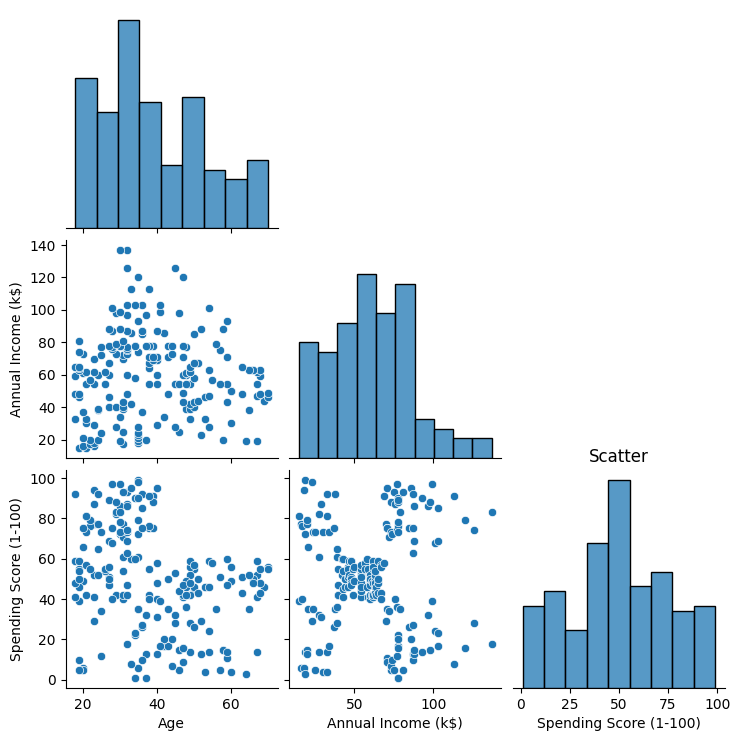

In [19]:
sns.pairplot(data=clus_dataset[non_boolean], corner=True)
plt.title('Scatter')
plt.show()

#### Select the relevant features for clustering: 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)'

In [20]:
featureset = cust_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

#### Importing MinMaxScaler for normalizing the feature values


In [31]:
from sklearn.preprocessing import MinMaxScaler

#### Extract the values of the selected features for scaling


In [32]:
x = featureset.values

#### Initialize the MinMaxScaler, which scales features to a range between 0 and 1


In [33]:
min_max_scaler = MinMaxScaler()

#### Fit and transform the features using MinMaxScaler


In [34]:
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx[:5]

array([[0.01923077, 0.        , 0.3877551 ],
       [0.05769231, 0.        , 0.81632653],
       [0.03846154, 0.00819672, 0.05102041],
       [0.09615385, 0.00819672, 0.7755102 ],
       [0.25      , 0.01639344, 0.39795918]])

#### Importing Euclidean distance function and hierarchical clustering methods

In [35]:
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster import hierarchy

#### Calculate the pairwise Euclidean distances between all the data points in the scaled feature matrix


In [36]:
dist_matrix = euclidean_distances(feature_mtx, feature_mtx)
print(dist_matrix)

[[0.         0.43029381 0.33738296 ... 1.00888686 1.0528145  1.11639204]
 [0.43029381 0.         0.76559158 ... 0.93683095 1.20748243 1.01507247]
 [0.33738296 0.76559158 0.         ... 1.16089362 1.02563246 1.27984489]
 ...
 [1.00888686 0.93683095 1.16089362 ... 0.         0.57849818 0.13432353]
 [1.0528145  1.20748243 1.02563246 ... 0.57849818 0.         0.66437953]
 [1.11639204 1.01507247 1.27984489 ... 0.13432353 0.66437953 0.        ]]


#### Perform hierarchical clustering using the distance matrix with 'complete' linkage method

In [25]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\IDS\AppData\Local\Temp\ipykernel_10464\1633147189.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


#### Define a label function for customizing the labels on the dendrogram

In [37]:
def llf(data):
    gender = data['Gender']
    age = int(float(data['Age']))  # Convert age to integer
    spending_score = int(float(data['Spending Score (1-100)']))  # Convert spending score to integer
    annual_income = int(float(data['Annual Income (k$)']))  # Convert annual income to integer
    # Return a formatted string for each data point
    return f'[{gender} {age} {spending_score} {annual_income}]'

#### Create and configure the dendrogram plot with custom labels and orientations

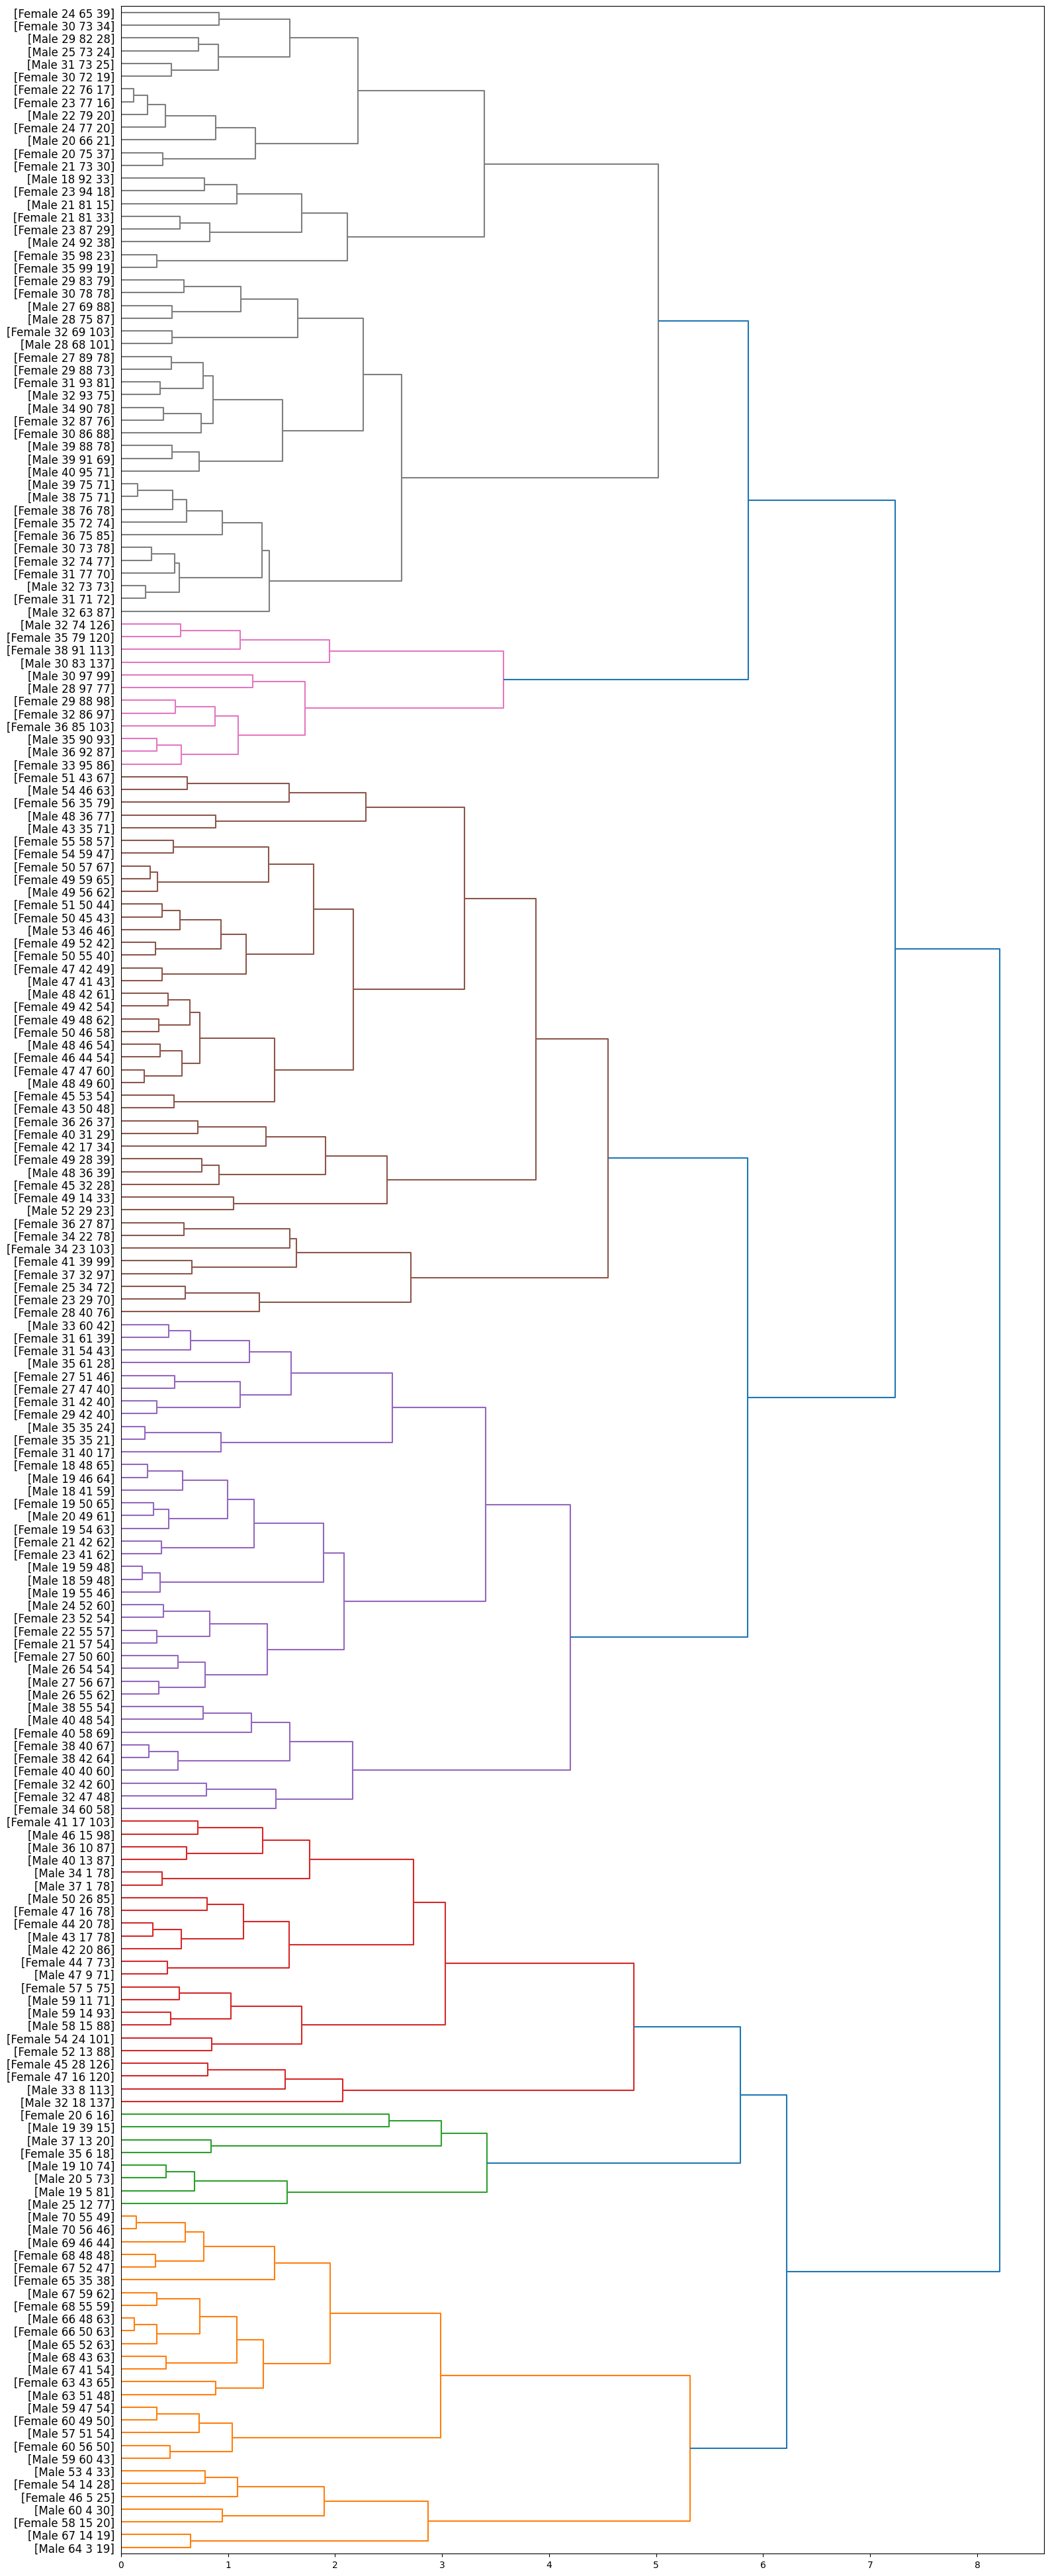

In [38]:
fig = plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z_using_dist_matrix, 
                              leaf_label_func=lambda id: llf(cust_df.iloc[id]), 
                              leaf_rotation=0, 
                              leaf_font_size=12, 
                              orientation='right')

#### Importing AgglomerativeClustering for fitting the model and performing the clustering


In [39]:
from sklearn.cluster import AgglomerativeClustering

#### Initialize AgglomerativeClustering with 5 clusters and 'complete' linkage method


In [40]:
agglom = AgglomerativeClustering(n_clusters = 5, linkage='complete')

#### Fit the clustering model to the distance matrix


In [41]:
agglom.fit(dist_matrix)

agglom.labels_

C:\Users\IDS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:567: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([1, 2, 1, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       3, 2, 3, 2, 0, 0, 0, 2, 3, 2, 3, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 3, 0,
       0, 3, 0, 0, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 4, 0, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 4, 0, 2, 1, 2, 1, 4, 1, 2,
       1, 2, 1, 4, 0, 4, 1, 4, 0, 4, 1, 2, 1, 4, 0, 2, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int64)

#### Assign the cluster labels to a new column in the original dataframe

In [28]:
cust_df['cluster_'] = agglom.labels_
cust_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_
0,1,Male,19,15,39,1
1,2,Male,21,15,81,2
2,3,Female,20,16,6,1
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0


#### Group the data by cluster and gender, and count the number of occurrences in each group


In [44]:
cust_df.groupby(['cluster_', 'Gender'])['cluster_'].count()

cluster_  Gender
0         Female    56
          Male      26
1         Female    11
          Male      20
2         Female    28
          Male      20
3         Female    11
          Male      16
4         Female     6
          Male       6
Name: cluster_, dtype: int64